<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/LS_DS3_121_Scrape_and_process_data_LIVE_LESSON_Ned_Horsey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4, requests

result = requests.get(url)

In [129]:
result

<Response [200]>

In [130]:
type(result)

requests.models.Response

In [131]:
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [132]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [134]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [135]:
type(soup.select('h2'))

list

In [136]:
len(soup.select('h2'))

95

In [137]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [138]:
type(first)

bs4.element.Tag

In [139]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [140]:
type(first.text)

str

In [141]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [142]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:

# This ....
titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)

#   ....is the same as this:
titles = [tag.text.strip() 
          for tag in soup.select('h2')]



In [144]:
type(titles), len(titles)

(list, 95)

In [145]:
titles[0], titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [146]:
long_titles = []
for title in titles:
  if len(title) > 80:
#     print(title)
    long_titles.append(title)
  
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [147]:
long_titles = [title for title in titles if len(title) > 80]

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [148]:
def long(title):
  return len(title) > 80

long('Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline')

True

In [149]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [150]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth=200

In [152]:
df = pd.DataFrame({'title': titles})
df.shape

(95, 1)

In [153]:
df[df['title'].str.len()>80]

condition = df['title'].str.len()>80

df[condition]



# df['title','is_long']

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [154]:
df['title'].str.len() > 80

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
65    False
66     True
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84     True
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: title, Length: 95, dtype: bool

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [155]:
 df['title length'] = df['title'].apply(len)
  
 df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [156]:
df[df['title length'] > 80]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [157]:
df.loc[df['title length'] > 80, 'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [158]:
df['long title'] = condition
df.shape

(95, 3)

In [159]:
df.drop(columns=['is_long'], inplace=True)
df.head()

ValueError: ignored

In [0]:
df[df['long title']==True]

### first letter

In [0]:
# 'Python is great!'[0]

df['title'].str[0]

# df['title'][88]

df['first letter'] = df['title'].str[0]

In [0]:
df[df['first letter'] == 'P']

In [0]:
'Python'.lower().startswith('p')

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

In [0]:
import textstat

In [0]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)
df.shape, df.head()

In [0]:
df[df['title word count'] <= 3]

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(index=str, columns={'title wordcount': 'title character count'})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [0]:
df.describe()

In [0]:
df.describe(exclude='number')

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [0]:
# df.sort_values(by='title character count').head(5)


df = df.drop(columns=df[1])

df.head()


Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

In [0]:
df['long title'].value_counts(normalize = True)

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

In [0]:
(df['first letter']
 .value_counts()
 .head(5)
.plot.
barh(color = 'Blue', title='Top 5 most frequent first letters in pycon talks'));

Histogram of title lengths, in characters

In [160]:
# df.drop(df.columns[cols],axis=1,inplace=True)
# df.drop(df.columns[4], axis=1, inplace=True)
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


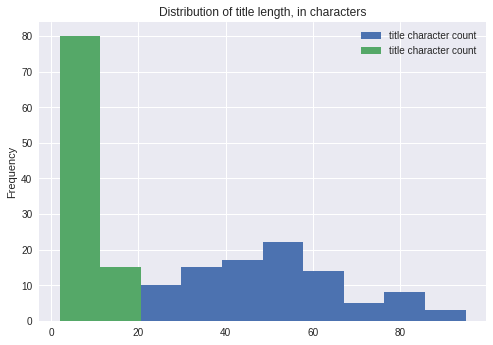

In [123]:
df['title character count'].plot.hist(title='Distribution of title length, in characters');

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?